#### Data Understanding and Exploration

In [204]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# To Scale our data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [205]:
# reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [206]:
#check missing percentage
percent_missing =(housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending=False)
percent_missing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

In [207]:
# Here we are dropping Columns with high missing values ,above 40%

housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

#### Treating Missing values

In [208]:
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [209]:
#Treating missing values by imputing for columns with missing values less than or equal to 40%

housing['LotFrontage']= housing.LotFrontage.fillna(housing.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
housing['MasVnrArea']= housing.MasVnrArea.fillna(housing.MasVnrArea.median())    # Can see presence of outlier
housing['GarageYrBlt']= housing.GarageYrBlt.fillna(housing.GarageYrBlt.mean())  # it looks stable with no outlier presence so imputing the missing values through mean

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

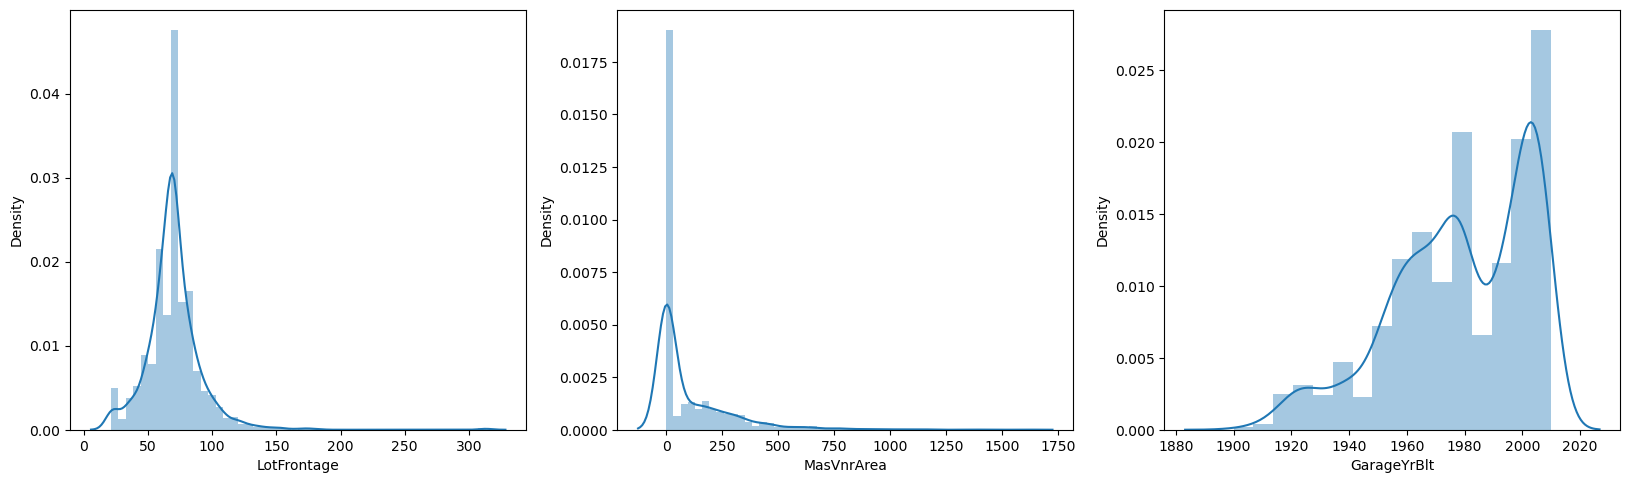

In [210]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(housing['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(housing['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(housing['GarageYrBlt'])

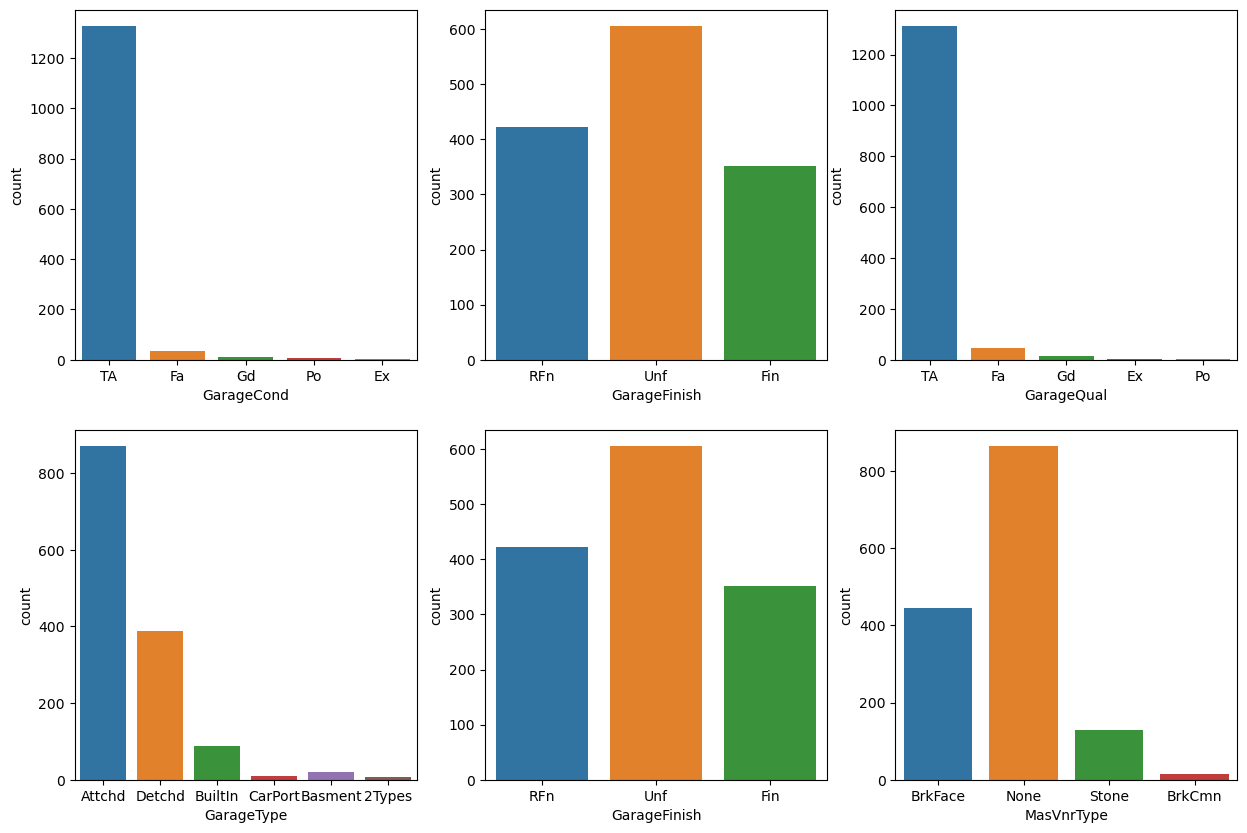

In [211]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing)
plt.show()

In [212]:
# The cases when house doesn't have the garrage so replacing null with NA
housing['GarageType'] = housing['GarageType'].fillna('NA')
housing['GarageFinish'] = housing['GarageFinish'].fillna('NA')
housing['GarageCond'] = housing['GarageCond'].fillna('NA')
housing['GarageQual'] = housing['GarageQual'].fillna('NA')

housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

In [213]:
#changing the num to categorical so as to form these as dummy variables 
housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing['OverallCond']=housing['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [214]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [215]:
# Basement features: Fill missing values with 'NA'
housing['BsmtQual'] = housing['BsmtQual'].fillna('NA')
housing['BsmtCond'] = housing['BsmtCond'].fillna('NA')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('NA')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('NA')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('NA')

In [216]:
#check missing percentage
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

In [217]:
#A descriptive form of summary statistucs
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

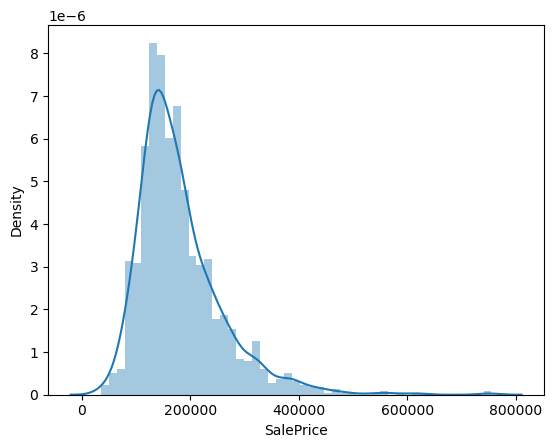

In [218]:
sns.distplot(housing['SalePrice'])

In [219]:
# Above plot is skewed
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.882876


In [220]:
housing['SalePrice']=np.log(housing.SalePrice) #tranforming to form normal disribution

In [221]:
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

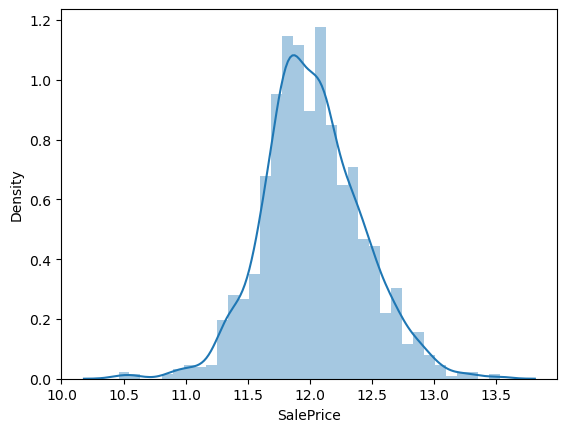

In [222]:
sns.distplot(housing['SalePrice']) # Normally distributed now

In [223]:
#skewness 
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 0.121335


#### Exploratory Data Analysis (EDA)

In [224]:
cat_cols = housing.select_dtypes(include=['object'])
cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

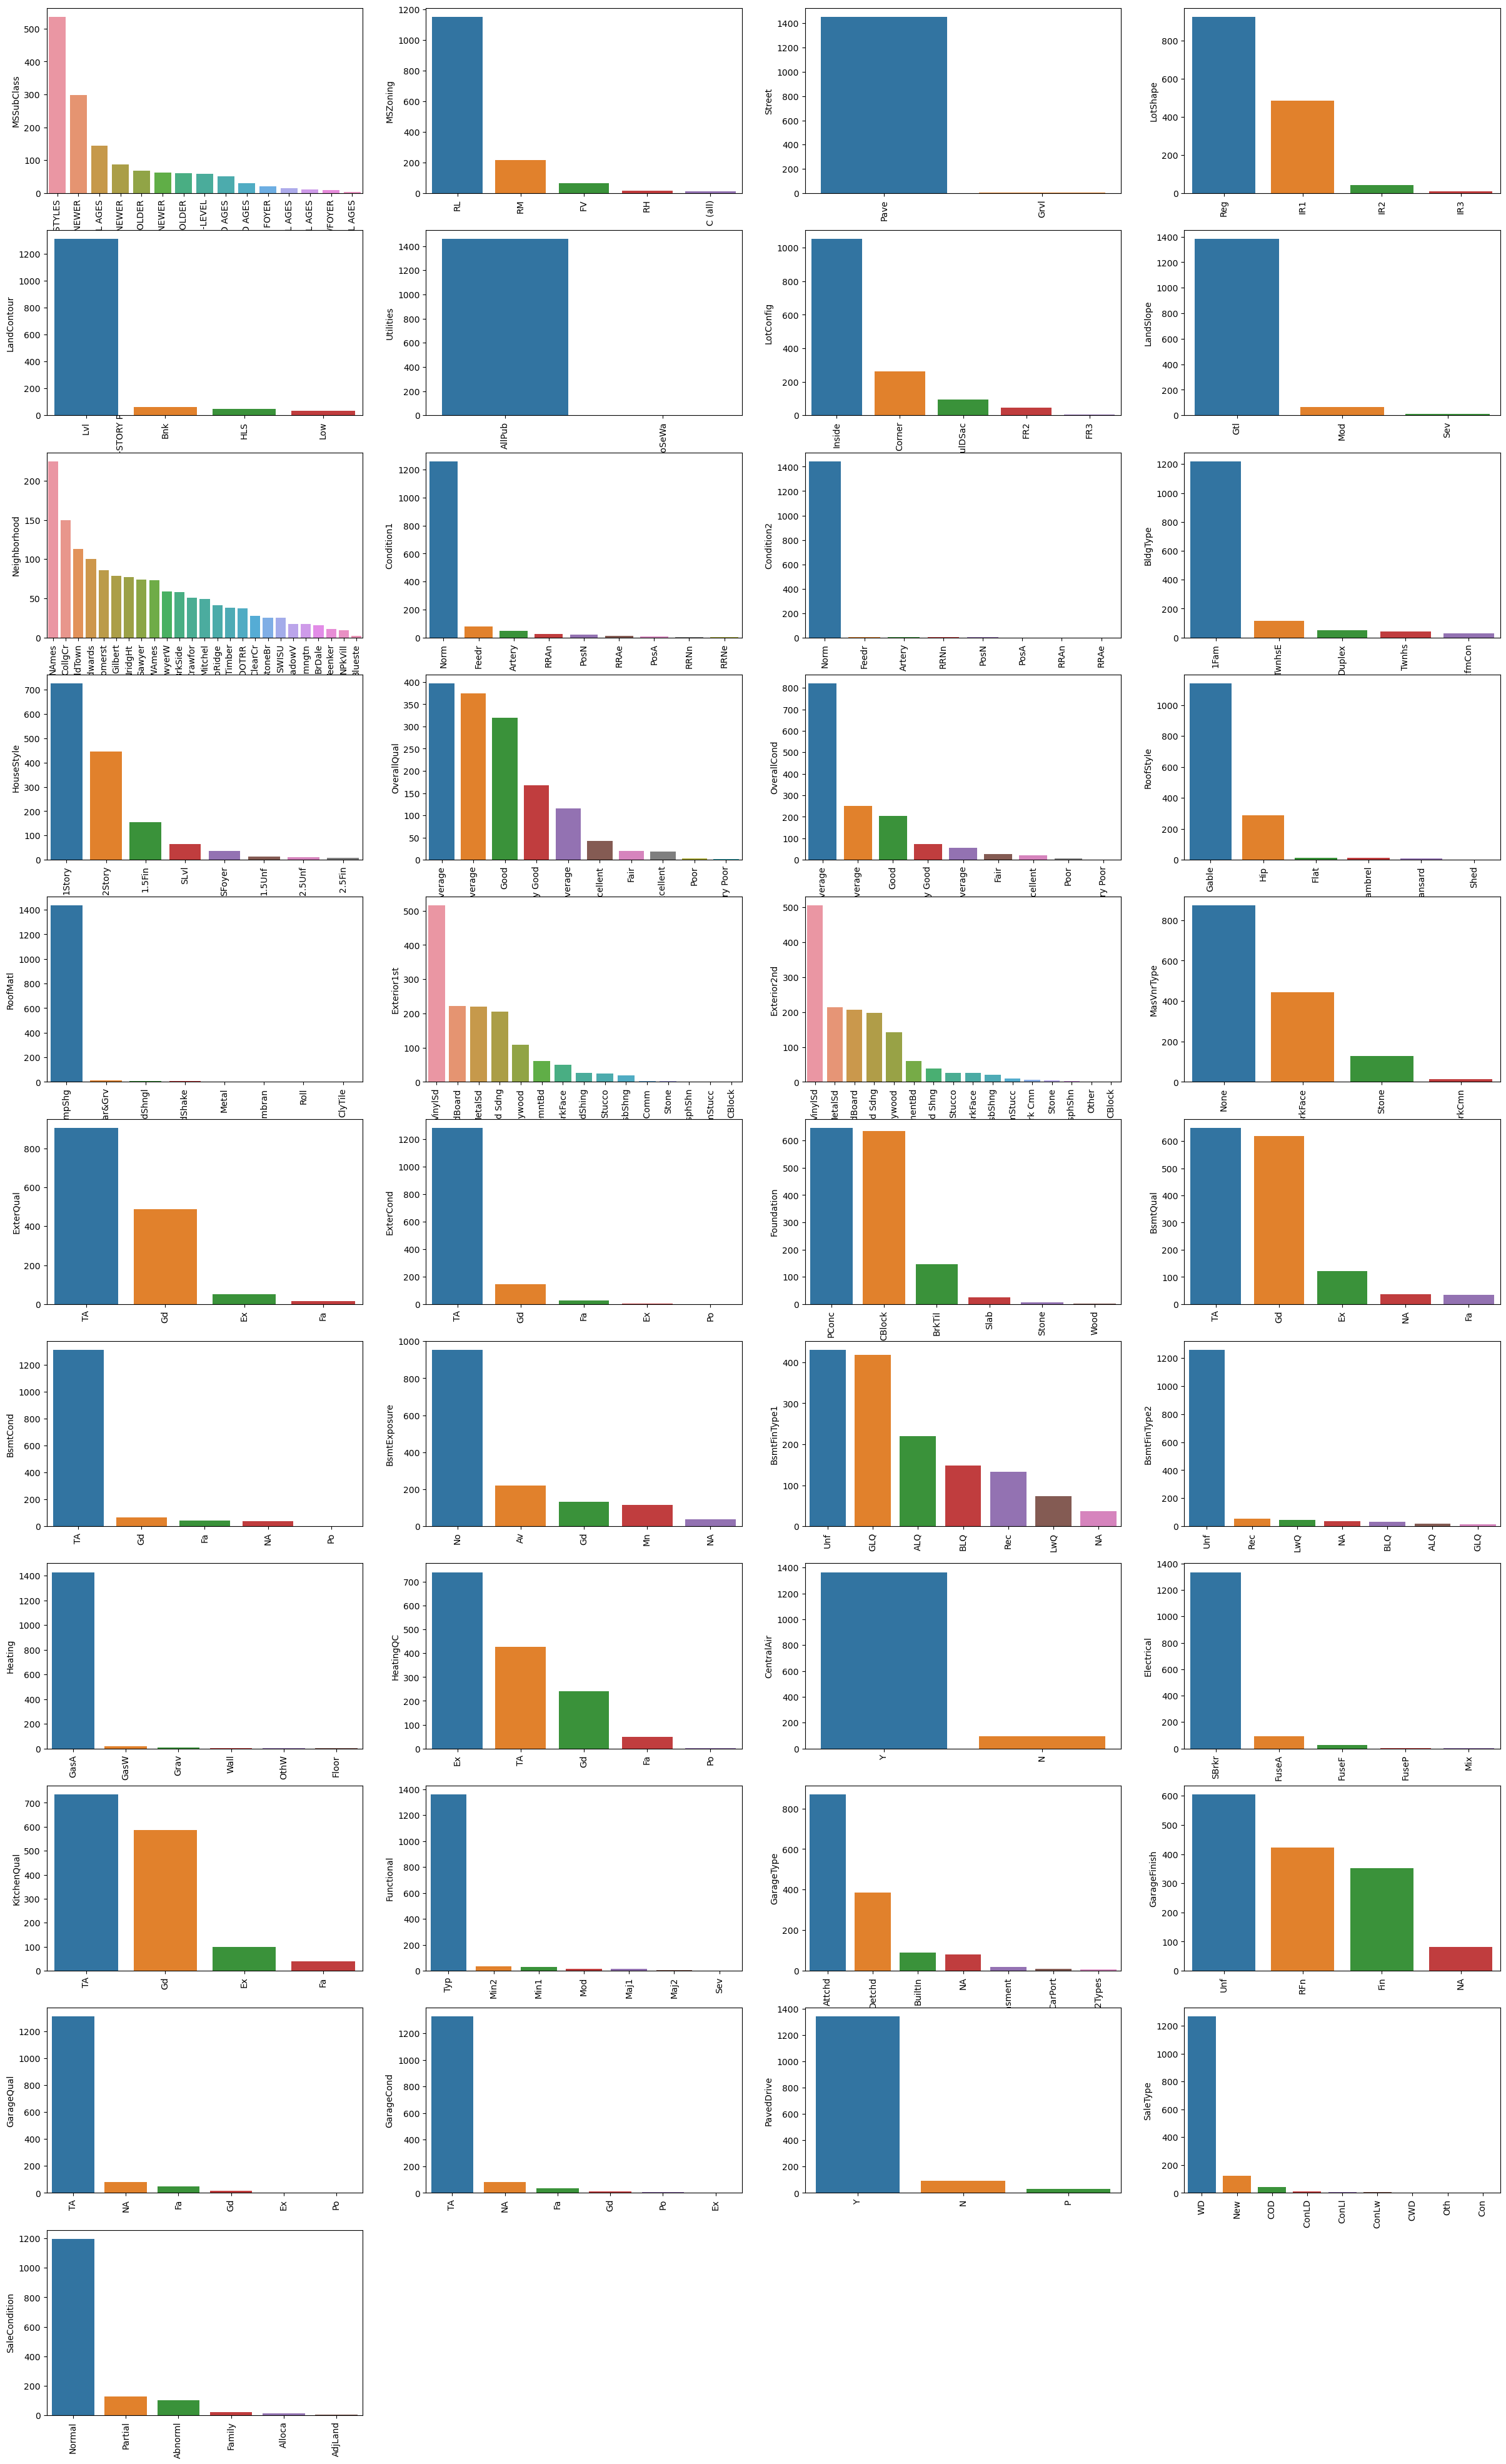

In [225]:
plt.figure(figsize=(30,50))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
abc=1
for col in cat_cols:
  y = housing[col].value_counts()
  plt.subplot(11,4,abc)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  abc+=1

In [226]:
# Dropping the highly skewed column 
housing.drop(['Functional'],axis=1,inplace=True)
housing.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)
housing.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)
housing.drop(['RoofMatl'],axis=1,inplace=True)
housing.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)
housing.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)
housing.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

# Dropping the ID column as it is of no use
housing.drop(['Id'],axis=1,inplace=True)

#### Dummy Variable creation

In [227]:
Cat1 = housing.select_dtypes(include=['object']) #checking all the categorical columns to form a dummy variables
print(Cat1.columns)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')


In [228]:
Cat1

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-STORY 1946 & NEWER,RL,Reg,Inside,Gilbert,1Fam,2Story,Above Average,Average,Gable,...,TA,PConc,Gd,No,Unf,Ex,TA,Attchd,RFn,Normal
1456,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,Inside,NWAmes,1Fam,1Story,Above Average,Above Average,Gable,...,TA,CBlock,Gd,No,ALQ,TA,TA,Attchd,Unf,Normal
1457,2-STORY 1945 & OLDER,RL,Reg,Inside,Crawfor,1Fam,2Story,Good,Excellent,Gable,...,Ex,Stone,TA,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1458,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,Inside,NAmes,1Fam,1Story,Average,Above Average,Hip,...,TA,CBlock,TA,Mn,GLQ,Gd,Gd,Attchd,Unf,Normal


In [229]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 157)


In [230]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [231]:
# concat the dummy variables with themain dataset
housing = pd.concat([housing, Cat1], axis=1) 

In [232]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,1,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,...,0,0,0,1,0,0,0,0,1,0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,1,0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,...,1,0,0,0,1,0,0,0,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,...,0,0,0,1,0,0,0,0,1,0


In [233]:
housing.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables 

In [234]:
housing.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [235]:
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [236]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0


In [237]:
# Putting feature variable to X
X = housing.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0


In [238]:
# Putting response variable to y
y = housing['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### Splitting the dataset and then scaling

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [240]:
Num = housing.select_dtypes(include=['int64','float64']) #all the numerical variables
print(Num.columns)


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')


In [241]:
Num.drop(['SalePrice'],axis=1,inplace=True)

In [242]:
scaler=StandardScaler()
X_train[Num.columns]=scaler.fit_transform(X_train[Num.columns])

In [243]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,0,1,1,0,0,0,0,0,1,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,0,0,0,1,0,0,0,0,1,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,1,0,0,0,1,0,0,0,1,0
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,0,0,0,0,1,0,0,0,1,0
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,1,0,0,0,1,0,0,0,1,0


In [244]:
X_test[Num.columns]=scaler.transform(X_test[Num.columns])
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.432493,-0.144189,-0.558025,0.361992,-0.293313,-0.704396,-0.430911,-0.765065,-0.787597,-0.124502,...,1,0,0,0,1,0,0,0,1,0
57,0.881585,0.112505,-0.558025,-0.963574,-0.293313,0.660317,-0.439628,-0.775120,1.189021,-0.124502,...,0,0,0,1,0,0,0,0,1,0
780,-0.296554,-0.253368,-0.355087,-0.963574,-0.293313,1.500998,0.381881,0.212779,-0.787597,-0.124502,...,0,0,0,0,0,0,0,0,1,0
382,0.428455,-0.120412,-0.558025,-0.963574,-0.293313,0.836481,-0.267481,-0.576535,1.184425,-0.124502,...,0,0,0,1,0,0,0,0,1,0
1170,0.292515,-0.058786,-0.558025,0.159714,-0.293313,0.022559,0.074633,-0.126576,-0.787597,-0.124502,...,0,0,0,0,0,0,0,0,1,0


##### Model building and Evaluation
- Linear Regression
- Ridge Regression
- Lasso Regression

In [245]:
# For Feture Selection
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)

r2_train_lr=r2_score(y_train,y_pred_train)
print("Linear Regression Train Score: ",r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print("Linear Regression Test Score: ",r2_test_lr)

Linear Regression Train Score:  0.9236231962967287
Linear Regression Test Score:  -3.242551562861115e+16


In [264]:
# This vast variation in R2 clealy suggests non-linearity in data and now trying to fix this by using regularization techniques 

##### Starting with Ridge Regression Model

In [246]:
# list of alphas to tune
params={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50,100,500,1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [247]:
print(model_cv.best_params_)

{'alpha': 2.0}


In [248]:
# Fitting Ridge model for alpha=7.0 and printing coefficients which have been penalised
alpha=2.0
ridge=linear_model.Ridge(alpha)

ridge.fit(X_train,y_train)

y_pred_train=ridge.predict(X_train)
y_pred_test=ridge.predict(X_test)

metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print("Train Score: ",r2_train_lr)

metric.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print("Test Score: ",r2_test_lr)

metric.append(r2_test_lr)

Train Score:  0.9194317981424357
Test Score:  0.8806480987208032


In [249]:
### Above R2 scores are good for train and test data

In [250]:
ridge.coef_

array([-1.29983242e-02,  1.43667633e-02, -2.33097847e-03, -2.52272029e-03,
        1.32056165e-03,  1.05676837e-02,  8.26349301e-03,  2.62126980e-02,
        4.96267117e-02,  2.02862906e-04,  6.02332989e-02,  2.64052865e-02,
        5.66907116e-03,  3.34366540e-02,  2.20613768e-02,  3.65736612e-03,
       -3.13018094e-02,  1.58815200e-02,  1.94127545e-02,  4.20109610e-02,
        2.44897130e-03,  1.22821232e-02, -2.93299642e-03,  7.63815997e-03,
        6.86154611e-03,  1.11267544e-02, -9.59069891e-03, -3.62867412e-04,
        6.14564935e-04,  2.42954093e-02, -9.52858988e-02,  4.82403907e-02,
       -1.63973050e-03, -3.11922395e-02,  7.32598487e-03,  4.79445510e-02,
        2.72549514e-02,  2.21976083e-03, -3.57570417e-02,  4.36602519e-02,
       -3.33833594e-02,  5.32130238e-02,  2.28981954e-02,  1.53343129e-01,
        1.59652595e-01,  1.47931361e-01,  1.18740089e-01,  3.07018480e-02,
       -4.34039726e-02,  1.24444564e-02,  3.62077792e-02, -4.89978693e-02,
       -4.13235729e-02, -

In [251]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.834),
 ('LotFrontage', -0.23),
 ('LotArea', -0.214),
 ('MasVnrArea', -0.114),
 ('BsmtFinSF1', -0.1),
 ('BsmtFinSF2', -0.096),
 ('BsmtUnfSF', -0.095),
 ('TotalBsmtSF', -0.093),
 ('1stFlrSF', -0.086),
 ('2ndFlrSF', -0.085),
 ('LowQualFinSF', -0.083),
 ('GrLivArea', -0.083),
 ('BsmtFullBath', -0.083),
 ('BsmtHalfBath', -0.08),
 ('FullBath', -0.08),
 ('HalfBath', -0.08),
 ('BedroomAbvGr', -0.08),
 ('KitchenAbvGr', -0.074),
 ('TotRmsAbvGrd', -0.073),
 ('Fireplaces', -0.073),
 ('GarageCars', -0.07),
 ('GarageArea', -0.065),
 ('WoodDeckSF', -0.064),
 ('OpenPorchSF', -0.062),
 ('EnclosedPorch', -0.06),
 ('3SsnPorch', -0.051),
 ('ScreenPorch', -0.049),
 ('PoolArea', -0.049),
 ('MiscVal', -0.048),
 ('MoSold', -0.045),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.043),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.043),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.041),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.039),
 ('MSSubClass_1-STORY W/FINI

#### Now, applying Lasso Regression

In [252]:
# list of alphas to tune
params={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50,100,500,1000]}

lasso = Lasso()

# cross validation system
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [253]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [254]:
# Fitting Ridge model for alpha=100 and printing coefficients which have been penalised
alpha=0.0001
lasso=linear_model.Lasso(alpha)

lasso.fit(X_train,y_train)

y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)

metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print("Train Score: ",r2_train_lr)

metric.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print("Test Score: ",r2_test_lr)

metric.append(r2_test_lr)

Train Score:  0.9214945611839385
Test Score:  0.8824558970454122


In [255]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.732),
 ('LotFrontage', -0.397),
 ('LotArea', -0.226),
 ('MasVnrArea', -0.223),
 ('BsmtFinSF1', -0.203),
 ('BsmtFinSF2', -0.157),
 ('BsmtUnfSF', -0.126),
 ('TotalBsmtSF', -0.117),
 ('1stFlrSF', -0.088),
 ('2ndFlrSF', -0.088),
 ('LowQualFinSF', -0.087),
 ('GrLivArea', -0.086),
 ('BsmtFullBath', -0.082),
 ('BsmtHalfBath', -0.082),
 ('FullBath', -0.081),
 ('HalfBath', -0.076),
 ('BedroomAbvGr', -0.076),
 ('KitchenAbvGr', -0.074),
 ('TotRmsAbvGrd', -0.065),
 ('Fireplaces', -0.064),
 ('GarageCars', -0.063),
 ('GarageArea', -0.054),
 ('WoodDeckSF', -0.046),
 ('OpenPorchSF', -0.046),
 ('EnclosedPorch', -0.046),
 ('3SsnPorch', -0.045),
 ('ScreenPorch', -0.044),
 ('PoolArea', -0.039),
 ('MiscVal', -0.039),
 ('MoSold', -0.037),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.036),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.034),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.033),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.033),
 ('MSSubClass_1-STO

#### Scores Summary
- Ridge:
    - Train: 0.9194
    - Test: 0.8806

- Lasso:
    - Train: 0.9214
    - Test: 0.8824

#### Assignment Questions Work:

In [256]:
# Doubling the Alpha for both Ridge and lasso
alpha_ridge=4.0
alpha_lasso=.0002

### Ridge
ridge=linear_model.Ridge(alpha_ridge)

ridge.fit(X_train,y_train)

y_pred_train=ridge.predict(X_train)
y_pred_test=ridge.predict(X_test)

r2_train_lr=r2_score(y_train,y_pred_train)
print("Ridge: Post doubling alpha, train score: ",r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print("Ridge: Post doubling alpha, test score: ",r2_test_lr)

### Lasso
lasso=linear_model.Lasso(alpha_lasso)

lasso.fit(X_train,y_train)

y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)

r2_train_lr=r2_score(y_train,y_pred_train)
print("Lasso: Post doubling alpha, train score: ",r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print("Lasso: Post doubling alpha, test score: ",r2_test_lr)



Ridge: Post doubling alpha, train score:  0.9163598257182354
Ridge: Post doubling alpha, test score:  0.879606892018711


Lasso: Post doubling alpha, train score:  0.9186822340479
Lasso: Post doubling alpha, test score:  0.8813122741331276


In [257]:
# Ridge model parameters post doubling alpha
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.911),
 ('LotFrontage', -0.194),
 ('LotArea', -0.16),
 ('MasVnrArea', -0.101),
 ('BsmtFinSF1', -0.095),
 ('BsmtFinSF2', -0.093),
 ('BsmtUnfSF', -0.093),
 ('TotalBsmtSF', -0.091),
 ('1stFlrSF', -0.085),
 ('2ndFlrSF', -0.079),
 ('LowQualFinSF', -0.075),
 ('GrLivArea', -0.074),
 ('BsmtFullBath', -0.071),
 ('BsmtHalfBath', -0.069),
 ('FullBath', -0.067),
 ('HalfBath', -0.066),
 ('BedroomAbvGr', -0.066),
 ('KitchenAbvGr', -0.066),
 ('TotRmsAbvGrd', -0.062),
 ('Fireplaces', -0.06),
 ('GarageCars', -0.06),
 ('GarageArea', -0.056),
 ('WoodDeckSF', -0.056),
 ('OpenPorchSF', -0.053),
 ('EnclosedPorch', -0.046),
 ('3SsnPorch', -0.045),
 ('ScreenPorch', -0.045),
 ('PoolArea', -0.045),
 ('MiscVal', -0.044),
 ('MoSold', -0.041),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.04),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.04),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.039),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.037),
 ('MSSubClass_1-STORY W/

In [258]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.845),
 ('LotFrontage', -0.361),
 ('LotArea', -0.234),
 ('MasVnrArea', -0.16),
 ('BsmtFinSF1', -0.129),
 ('BsmtFinSF2', -0.116),
 ('BsmtUnfSF', -0.112),
 ('TotalBsmtSF', -0.111),
 ('1stFlrSF', -0.087),
 ('2ndFlrSF', -0.084),
 ('LowQualFinSF', -0.081),
 ('GrLivArea', -0.079),
 ('BsmtFullBath', -0.077),
 ('BsmtHalfBath', -0.071),
 ('FullBath', -0.069),
 ('HalfBath', -0.067),
 ('BedroomAbvGr', -0.064),
 ('KitchenAbvGr', -0.062),
 ('TotRmsAbvGrd', -0.061),
 ('Fireplaces', -0.055),
 ('GarageCars', -0.055),
 ('GarageArea', -0.05),
 ('WoodDeckSF', -0.044),
 ('OpenPorchSF', -0.04),
 ('EnclosedPorch', -0.039),
 ('3SsnPorch', -0.037),
 ('ScreenPorch', -0.037),
 ('PoolArea', -0.035),
 ('MiscVal', -0.035),
 ('MoSold', -0.032),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.031),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.03),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.03),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.028),
 ('MSSubClass_1-STORY W/

##### Removing the five most important predictor variables we have got from Lasso Model

In [259]:
# Resetting the Alpha to optimal value for Lasso
alpha_lasso=.0001

### Lasso
lasso=linear_model.Lasso(alpha_lasso)

lasso.fit(X_train,y_train)

y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)

r2_train_lr=r2_score(y_train,y_pred_train)
print("Lasso: Train score: ",r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print("Lasso: Test score: ",r2_test_lr)

# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

Lasso: Train score:  0.9214945611839385
Lasso: Test score:  0.8824558970454122


[('constant', 11.732),
 ('LotFrontage', -0.397),
 ('LotArea', -0.226),
 ('MasVnrArea', -0.223),
 ('BsmtFinSF1', -0.203),
 ('BsmtFinSF2', -0.157),
 ('BsmtUnfSF', -0.126),
 ('TotalBsmtSF', -0.117),
 ('1stFlrSF', -0.088),
 ('2ndFlrSF', -0.088),
 ('LowQualFinSF', -0.087),
 ('GrLivArea', -0.086),
 ('BsmtFullBath', -0.082),
 ('BsmtHalfBath', -0.082),
 ('FullBath', -0.081),
 ('HalfBath', -0.076),
 ('BedroomAbvGr', -0.076),
 ('KitchenAbvGr', -0.074),
 ('TotRmsAbvGrd', -0.065),
 ('Fireplaces', -0.064),
 ('GarageCars', -0.063),
 ('GarageArea', -0.054),
 ('WoodDeckSF', -0.046),
 ('OpenPorchSF', -0.046),
 ('EnclosedPorch', -0.046),
 ('3SsnPorch', -0.045),
 ('ScreenPorch', -0.044),
 ('PoolArea', -0.039),
 ('MiscVal', -0.039),
 ('MoSold', -0.037),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.036),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.034),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.033),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.033),
 ('MSSubClass_1-STO

In [260]:
X_train.drop(columns=['SaleCondition_AdjLand','SaleCondition_Alloca',"SaleCondition_Family",'SaleCondition_Normal','SaleCondition_Partial'],axis=1,inplace=True)
X_test.drop(columns=['SaleCondition_AdjLand','SaleCondition_Alloca',"SaleCondition_Family",'SaleCondition_Normal','SaleCondition_Partial'],axis=1,inplace=True)

In [261]:
# list of alphas to tune
params={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50,100,500,1000]}

lasso = Lasso()

# cross validation system
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [262]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [263]:
alpha_lasso=.0001

### Lasso
lasso=linear_model.Lasso(alpha_lasso)

lasso.fit(X_train,y_train)

y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)

r2_train_lr=r2_score(y_train,y_pred_train)
print("Lasso: Train score: ",r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print("Lasso: Test score: ",r2_test_lr)

# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

Lasso: Train score:  0.920536965780211
Lasso: Test score:  0.878377303913769


[('constant', 11.775),
 ('LotFrontage', -0.408),
 ('LotArea', -0.229),
 ('MasVnrArea', -0.221),
 ('BsmtFinSF1', -0.204),
 ('BsmtFinSF2', -0.165),
 ('BsmtUnfSF', -0.133),
 ('TotalBsmtSF', -0.12),
 ('1stFlrSF', -0.104),
 ('2ndFlrSF', -0.098),
 ('LowQualFinSF', -0.093),
 ('GrLivArea', -0.09),
 ('BsmtFullBath', -0.09),
 ('BsmtHalfBath', -0.088),
 ('FullBath', -0.08),
 ('HalfBath', -0.08),
 ('BedroomAbvGr', -0.078),
 ('KitchenAbvGr', -0.077),
 ('TotRmsAbvGrd', -0.068),
 ('Fireplaces', -0.065),
 ('GarageCars', -0.064),
 ('GarageArea', -0.057),
 ('WoodDeckSF', -0.052),
 ('OpenPorchSF', -0.046),
 ('EnclosedPorch', -0.045),
 ('3SsnPorch', -0.045),
 ('ScreenPorch', -0.043),
 ('PoolArea', -0.04),
 ('MiscVal', -0.039),
 ('MoSold', -0.038),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.037),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.037),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.034),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.034),
 ('MSSubClass_1-STORY W/F